Data: https://www.kaggle.com/nasa/meteorite-landings

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Code to filter the meteorite data. Only needs to be run once.

In [35]:
meteorites = pd.read_csv("./data/meteorite-landings.csv", delimiter=",")
filtered_coords = (meteorites["reclong"] >= -180) & (meteorites["reclong"] <= 180) & ((meteorites["reclong"] != 0) | (meteorites["reclat"] != 0))
filtered_years = (meteorites["year"] >= 860) & (meteorites["year"] <= 2016)
filtered_meteorites = meteorites[filtered_coords & filtered_years]
filtered_meteorites.to_csv("./data/cleansed-data.csv")

Code to plot the data

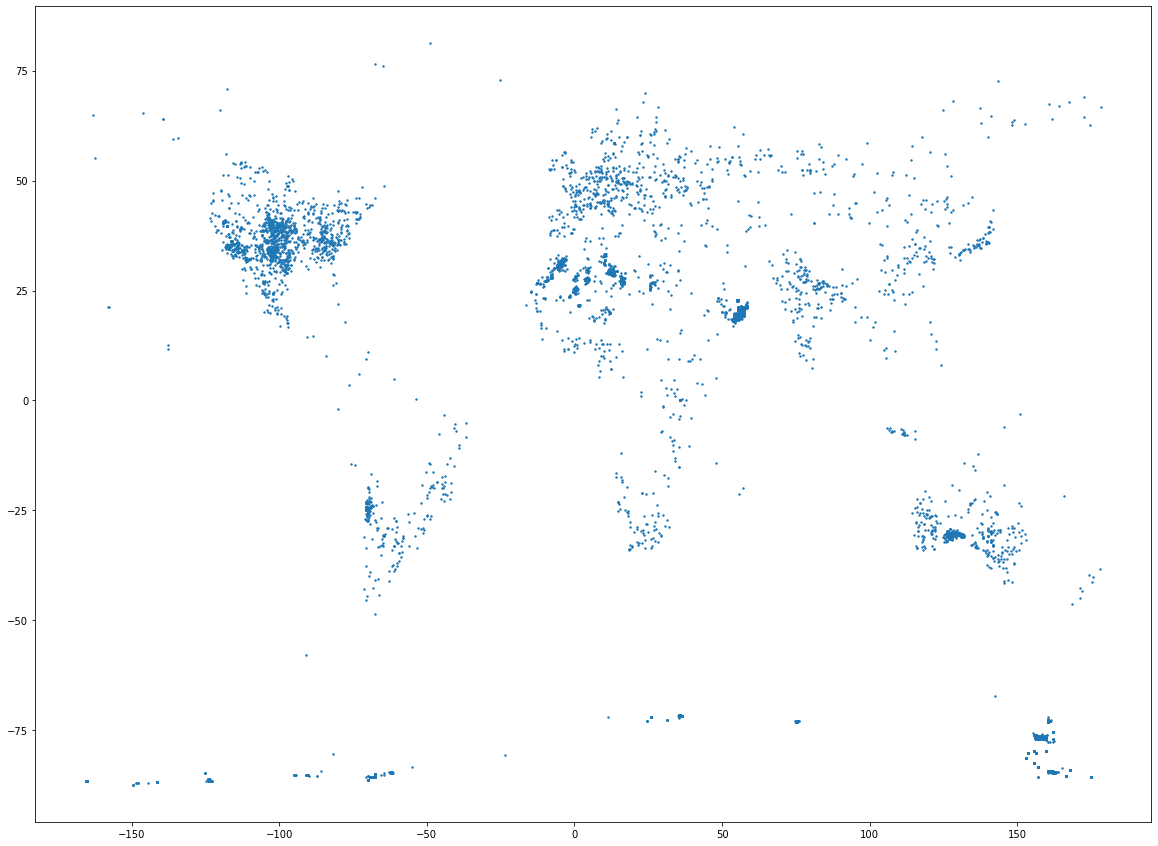

<Figure size 432x288 with 0 Axes>

In [10]:
cleansed_meteorites = pd.read_csv("./data/cleansed-data.csv", delimiter=",")
plt.figure(figsize=(20,15))
plt.scatter(cleansed_meteorites["reclong"], cleansed_meteorites["reclat"], s=2)
plt.show()
plt.savefig("./images/testplot.png", format="png")